/home/devuser/nlyalyus/projects/lm-evaluation-harness/cache/llama-2-7b-chat-hf/int4_sym_g128_r80_max_var/sensitivity_points.png


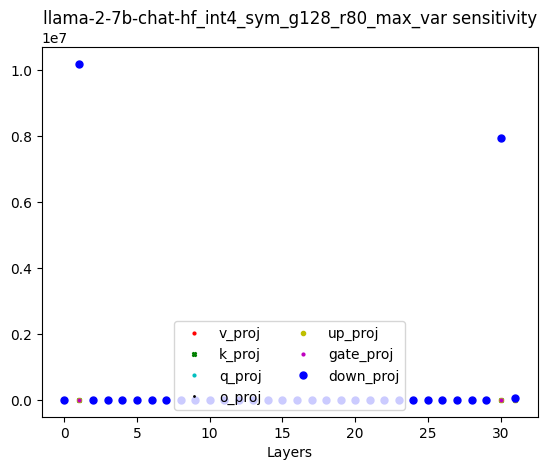

In [52]:
########################################
###### OUT OUT OUT  ####################
########################################
import json
import os
import matplotlib.pyplot as plt
from  pathlib import Path
import numpy as np

s = Path('/home/devuser/nlyalyus/projects/lm-evaluation-harness/cache/llama-2-7b-chat-hf/int4_sym_g128_r80_max_var/sensitivity_per_layer.json')
exp_name = s.parent.parent.name + '_' + s.parent.name

fig, ax = plt.subplots()
ax.set_title(f'{exp_name} sensitivity')
ax.set_xlabel('Layers')

with open(s) as f:
    j = json.load(f)
    traces = list(j.values())
    names = list(j.keys())

color_map = {
    'v_proj': ('r', 'o', 2),
    'k_proj': ('g', 'X', 3),
    'q_proj': ('c', 'o', 2),
    'o_proj': ('k', 'o', 1),
    'up_proj': ('y', 'o', 3),
    'gate_proj': ('m', 'o', 2),
    'down_proj': ('b', 'o', 5),
    # QWEN:
    # 'attn.c_attn': ('y', 'o', 3),
    # 'attn.c_proj': ('r', 'o', 2),
    # 'mlp.w2': ('g', 'X', 3),
    # 'mlp.w1': ('c', 'o', 2),
    # 'mlp.c_proj': ('b', 'o', 5),
}

for name, (color, marker, size) in color_map.items():
    traces = dict(filter(lambda p: name in p[0], j.items())).values()
    ax.plot(traces, linestyle="", marker=marker, markersize=size, color=color, label=name)
# plt.yscale('log')
ax.legend(loc='lower center', ncols=2)

# plt.ylim([1019, 1024])
# plt.xlim([5, 35])
# plt.show()
path_to_save = s.parent / "sensitivity_points.png"
print(path_to_save)
plt.savefig(path_to_save)

In [24]:
import numpy as np
inp = np.random.sample((4,10))
m = np.multiply(inp, inp)
m.shape


(4, 10)

In [25]:
s = np.sum(np.multiply(inp, inp), axis=1)
s

array([3.46346225, 2.5080869 , 6.40734747, 2.04141969])

In [33]:
n = int(s.size * 0.1) + 1
n

1

In [34]:

np.sort(s)[::-1][:n]

array([6.40734747])

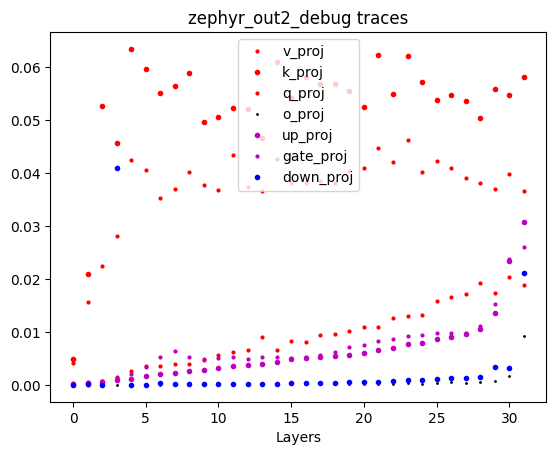

In [1]:
########################################
###### IN IN IN IN IN IN ###############
########################################
import json
import matplotlib.pyplot as plt
import numpy as np

# exp_name = 'stable_zephyr_IN1'
# exp_name = 'llama_IN1'

# s='/home/devuser/nlyalyus/projects/lm-evaluation-harness/cache/Llama-2-7b-chat-hf/fp16/var_per_node.json'
# s= '/home/devuser/nlyalyus/projects/lm-evaluation-harness/cache/zephyr-7b-beta/fp16/var_per_node_zephyr7b.json'
# s ='/home/devuser/nlyalyus/projects/lm-evaluation-harness/var_per_node.json'
# s = '/home/devuser/nlyalyus/projects/lm-evaluation-harness/cache/stable-zephyr-3b-dpo/fp16/var_per_node_stable_zephyr.json'
# s= '/home/devuser/nlyalyus/projects/lm-evaluation-harness/cache/Llama-2-7b-chat-hf/fp16/var_per_node_llama_IN1.json'
# s= '/home/devuser/nlyalyus/projects/lm-evaluation-harness/cache/zephyr-7b-beta/fp16/var_per_node_zephyr7b.json'
s = '/home/devuser/nlyalyus/projects/lm-evaluation-harness/cache/stable-zephyr-3b-dpo/fp16/var_per_node_stable_zephyr_OUT2.json'
exp_name = 'zephyr_out2_debug'

fig, ax = plt.subplots()
ax.set_title(f'{exp_name} traces')
ax.set_xlabel('Layers')

with open(s) as f:
    j = json.load(f)
    traces = list(j.values())
    names = list(j.keys())

color_map = {
    'v_proj': ('r', 'o', 2),
    'k_proj': ('r', 'o', 3),
    'q_proj': ('r', 'o', 2),
    'o_proj': ('k', 'o', 1),
    'up_proj': ('m', 'o', 3),
    'gate_proj': ('m', 'o', 2),
    'down_proj': ('b', 'o', 3),
}

for name, (color, marker, size) in color_map.items():
    traces = dict(filter(lambda p: name in p[0], j.items())).values()
    ax.plot(traces, linestyle="", marker=marker, markersize=size, color=color, label=name)
ax.legend(loc='center', ncols=1)

plt.savefig(f"traces_points_{exp_name}.png")

In [42]:
from difflib import SequenceMatcher
s1 = 'OpenVINO is an open-source software library for deep learning inference that is designed to optimize and run deep learning models on a variety of platforms, including CPUs, GPUs, and specialized accelerators like TPUs. OpenVINO is developed by Intel and is available under the Apache 2.0 license'
s2 = 'OpenVINO is an open-source software platform designed to accelerate the development and deployment of machine learning models. It provides a set of tools and libraries for creating, training, and deploying machine learning models on various hardware platforms, including CPUs, GPUs, and FPGAs. OpenVINO is developed and maintained by Intel, and it is available under the Apache 2.0 license, which means that it is free and open to use for anyone.'
s = SequenceMatcher(None, s1, s2)
mb=s.get_matching_blocks()
mb[0].size


In [4]:
all_internal_layers = [
    'self.model.layers.0.self_attn.v_proj',
    'self.model.layers.0.self_attn.k_proj',
    'self.model.layers.0.self_attn.q_proj',
    'self.model.layers.0.self_attn.o_proj',
    'self.model.layers.0.mlp.up_proj',
    'self.model.layers.0.mlp.gate_proj',
    'self.model.layers.0.mlp.down_proj',
    'self.model.layers.1.self_attn.v_proj',
    'self.model.layers.1.self_attn.k_proj',
    'self.model.layers.1.self_attn.q_proj',
    'self.model.layers.1.self_attn.o_proj',
    'self.model.layers.1.mlp.up_proj',
    'self.model.layers.1.mlp.gate_proj',
    'self.model.layers.1.mlp.down_proj',
    'self.model.layers.2.self_attn.v_proj',
    'self.model.layers.2.self_attn.k_proj',
    'self.model.layers.2.self_attn.q_proj',
    'self.model.layers.2.self_attn.o_proj',
    'self.model.layers.2.mlp.up_proj',
    'self.model.layers.2.mlp.gate_proj',
    'self.model.layers.2.mlp.down_proj',
    'self.model.layers.3.self_attn.v_proj',
    'self.model.layers.3.self_attn.k_proj',
    'self.model.layers.3.self_attn.q_proj',
    'self.model.layers.3.self_attn.o_proj',
    'self.model.layers.3.mlp.up_proj',
    'self.model.layers.3.mlp.gate_proj',
    'self.model.layers.3.mlp.down_proj',
    'self.model.layers.4.self_attn.v_proj',
    'self.model.layers.4.self_attn.k_proj',
    'self.model.layers.4.self_attn.q_proj',
    'self.model.layers.4.self_attn.o_proj',
    'self.model.layers.4.mlp.up_proj',
    'self.model.layers.4.mlp.gate_proj',
    'self.model.layers.4.mlp.down_proj',
    'self.model.layers.5.self_attn.v_proj',
    'self.model.layers.5.self_attn.k_proj',
    'self.model.layers.5.self_attn.q_proj',
    'self.model.layers.5.self_attn.o_proj',
    'self.model.layers.5.mlp.up_proj',
    'self.model.layers.5.mlp.gate_proj',
    'self.model.layers.5.mlp.down_proj',
    'self.model.layers.6.self_attn.v_proj',
    'self.model.layers.6.self_attn.k_proj',
    'self.model.layers.6.self_attn.q_proj',
    'self.model.layers.6.self_attn.o_proj',
    'self.model.layers.6.mlp.up_proj',
    'self.model.layers.6.mlp.gate_proj',
    'self.model.layers.6.mlp.down_proj',
    'self.model.layers.7.self_attn.v_proj',
    'self.model.layers.7.self_attn.k_proj',
    'self.model.layers.7.self_attn.q_proj',
    'self.model.layers.7.self_attn.o_proj',
    'self.model.layers.7.mlp.up_proj',
    'self.model.layers.7.mlp.gate_proj',
    'self.model.layers.7.mlp.down_proj',
    'self.model.layers.8.self_attn.v_proj',
    'self.model.layers.8.self_attn.k_proj',
    'self.model.layers.8.self_attn.q_proj',
    'self.model.layers.8.self_attn.o_proj',
    'self.model.layers.8.mlp.up_proj',
    'self.model.layers.8.mlp.gate_proj',
    'self.model.layers.8.mlp.down_proj',
    'self.model.layers.9.self_attn.v_proj',
    'self.model.layers.9.self_attn.k_proj',
    'self.model.layers.9.self_attn.q_proj',
    'self.model.layers.9.self_attn.o_proj',
    'self.model.layers.9.mlp.up_proj',
    'self.model.layers.9.mlp.gate_proj',
    'self.model.layers.9.mlp.down_proj',
    'self.model.layers.10.self_attn.v_proj',
    'self.model.layers.10.self_attn.k_proj',
    'self.model.layers.10.self_attn.q_proj',
    'self.model.layers.10.self_attn.o_proj',
    'self.model.layers.10.mlp.up_proj',
    'self.model.layers.10.mlp.gate_proj',
    'self.model.layers.10.mlp.down_proj',
    'self.model.layers.11.self_attn.v_proj',
    'self.model.layers.11.self_attn.k_proj',
    'self.model.layers.11.self_attn.q_proj',
    'self.model.layers.11.self_attn.o_proj',
    'self.model.layers.11.mlp.up_proj',
    'self.model.layers.11.mlp.gate_proj',
    'self.model.layers.11.mlp.down_proj',
    'self.model.layers.12.self_attn.v_proj',
    'self.model.layers.12.self_attn.k_proj',
    'self.model.layers.12.self_attn.q_proj',
    'self.model.layers.12.self_attn.o_proj',
    'self.model.layers.12.mlp.up_proj',
    'self.model.layers.12.mlp.gate_proj',
    'self.model.layers.12.mlp.down_proj',
    'self.model.layers.13.self_attn.v_proj',
    'self.model.layers.13.self_attn.k_proj',
    'self.model.layers.13.self_attn.q_proj',
    'self.model.layers.13.self_attn.o_proj',
    'self.model.layers.13.mlp.up_proj',
    'self.model.layers.13.mlp.gate_proj',
    'self.model.layers.13.mlp.down_proj',
    'self.model.layers.14.self_attn.v_proj',
    'self.model.layers.14.self_attn.k_proj',
    'self.model.layers.14.self_attn.q_proj',
    'self.model.layers.14.self_attn.o_proj',
    'self.model.layers.14.mlp.up_proj',
    'self.model.layers.14.mlp.gate_proj',
    'self.model.layers.14.mlp.down_proj',
    'self.model.layers.15.self_attn.v_proj',
    'self.model.layers.15.self_attn.k_proj',
    'self.model.layers.15.self_attn.q_proj',
    'self.model.layers.15.self_attn.o_proj',
    'self.model.layers.15.mlp.up_proj',
    'self.model.layers.15.mlp.gate_proj',
    'self.model.layers.15.mlp.down_proj',
    'self.model.layers.16.self_attn.v_proj',
    'self.model.layers.16.self_attn.k_proj',
    'self.model.layers.16.self_attn.q_proj',
    'self.model.layers.16.self_attn.o_proj',
    'self.model.layers.16.mlp.up_proj',
    'self.model.layers.16.mlp.gate_proj',
    'self.model.layers.16.mlp.down_proj',
    'self.model.layers.17.self_attn.v_proj',
    'self.model.layers.17.self_attn.k_proj',
    'self.model.layers.17.self_attn.q_proj',
    'self.model.layers.17.self_attn.o_proj',
    'self.model.layers.17.mlp.up_proj',
    'self.model.layers.17.mlp.gate_proj',
    'self.model.layers.17.mlp.down_proj',
    'self.model.layers.18.self_attn.v_proj',
    'self.model.layers.18.self_attn.k_proj',
    'self.model.layers.18.self_attn.q_proj',
    'self.model.layers.18.self_attn.o_proj',
    'self.model.layers.18.mlp.up_proj',
    'self.model.layers.18.mlp.gate_proj',
    'self.model.layers.18.mlp.down_proj',
    'self.model.layers.19.self_attn.v_proj',
    'self.model.layers.19.self_attn.k_proj',
    'self.model.layers.19.self_attn.q_proj',
    'self.model.layers.19.self_attn.o_proj',
    'self.model.layers.19.mlp.up_proj',
    'self.model.layers.19.mlp.gate_proj',
    'self.model.layers.19.mlp.down_proj',
    'self.model.layers.20.self_attn.v_proj',
    'self.model.layers.20.self_attn.k_proj',
    'self.model.layers.20.self_attn.q_proj',
    'self.model.layers.20.self_attn.o_proj',
    'self.model.layers.20.mlp.up_proj',
    'self.model.layers.20.mlp.gate_proj',
    'self.model.layers.20.mlp.down_proj',
    'self.model.layers.21.self_attn.v_proj',
    'self.model.layers.21.self_attn.k_proj',
    'self.model.layers.21.self_attn.q_proj',
    'self.model.layers.21.self_attn.o_proj',
    'self.model.layers.21.mlp.up_proj',
    'self.model.layers.21.mlp.gate_proj',
    'self.model.layers.21.mlp.down_proj',
    'self.model.layers.22.self_attn.v_proj',
    'self.model.layers.22.self_attn.k_proj',
    'self.model.layers.22.self_attn.q_proj',
    'self.model.layers.22.self_attn.o_proj',
    'self.model.layers.22.mlp.up_proj',
    'self.model.layers.22.mlp.gate_proj',
    'self.model.layers.22.mlp.down_proj',
    'self.model.layers.23.self_attn.v_proj',
    'self.model.layers.23.self_attn.k_proj',
    'self.model.layers.23.self_attn.q_proj',
    'self.model.layers.23.self_attn.o_proj',
    'self.model.layers.23.mlp.up_proj',
    'self.model.layers.23.mlp.gate_proj',
    'self.model.layers.23.mlp.down_proj',
    'self.model.layers.24.self_attn.v_proj',
    'self.model.layers.24.self_attn.k_proj',
    'self.model.layers.24.self_attn.q_proj',
    'self.model.layers.24.self_attn.o_proj',
    'self.model.layers.24.mlp.up_proj',
    'self.model.layers.24.mlp.gate_proj',
    'self.model.layers.24.mlp.down_proj',
    'self.model.layers.25.self_attn.v_proj',
    'self.model.layers.25.self_attn.k_proj',
    'self.model.layers.25.self_attn.q_proj',
    'self.model.layers.25.self_attn.o_proj',
    'self.model.layers.25.mlp.up_proj',
    'self.model.layers.25.mlp.gate_proj',
    'self.model.layers.25.mlp.down_proj',
    'self.model.layers.26.self_attn.v_proj',
    'self.model.layers.26.self_attn.k_proj',
    'self.model.layers.26.self_attn.q_proj',
    'self.model.layers.26.self_attn.o_proj',
    'self.model.layers.26.mlp.up_proj',
    'self.model.layers.26.mlp.gate_proj',
    'self.model.layers.26.mlp.down_proj',
    'self.model.layers.27.self_attn.v_proj',
    'self.model.layers.27.self_attn.k_proj',
    'self.model.layers.27.self_attn.q_proj',
    'self.model.layers.27.self_attn.o_proj',
    'self.model.layers.27.mlp.up_proj',
    'self.model.layers.27.mlp.gate_proj',
    'self.model.layers.27.mlp.down_proj',
    'self.model.layers.28.self_attn.v_proj',
    'self.model.layers.28.self_attn.k_proj',
    'self.model.layers.28.self_attn.q_proj',
    'self.model.layers.28.self_attn.o_proj',
    'self.model.layers.28.mlp.up_proj',
    'self.model.layers.28.mlp.gate_proj',
    'self.model.layers.28.mlp.down_proj',
    'self.model.layers.29.self_attn.v_proj',
    'self.model.layers.29.self_attn.k_proj',
    'self.model.layers.29.self_attn.q_proj',
    'self.model.layers.29.self_attn.o_proj',
    'self.model.layers.29.mlp.up_proj',
    'self.model.layers.29.mlp.gate_proj',
    'self.model.layers.29.mlp.down_proj',
    'self.model.layers.30.self_attn.v_proj',
    'self.model.layers.30.self_attn.k_proj',
    'self.model.layers.30.self_attn.q_proj',
    'self.model.layers.30.self_attn.o_proj',
    'self.model.layers.30.mlp.up_proj',
    'self.model.layers.30.mlp.gate_proj',
    'self.model.layers.30.mlp.down_proj',
    'self.model.layers.31.self_attn.v_proj',
    'self.model.layers.31.self_attn.k_proj',
    'self.model.layers.31.self_attn.q_proj',
    'self.model.layers.31.self_attn.o_proj',
    'self.model.layers.31.mlp.up_proj',
    'self.model.layers.31.mlp.gate_proj',
    'self.model.layers.31.mlp.down_proj'
]

In [12]:
ns = len(scores)
ns

163

In [10]:
names = all_internal_layers[:ns]

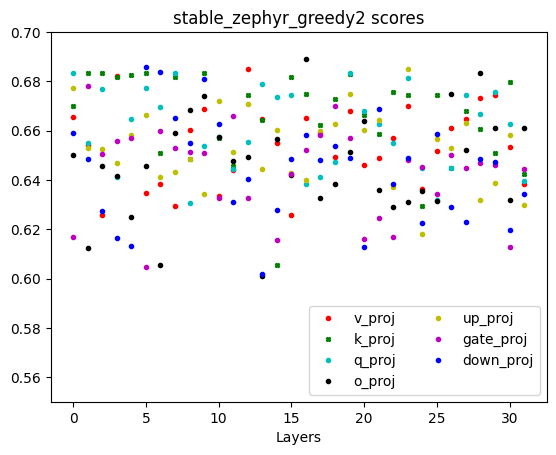

In [34]:
########################################
###### GREEDY  ####################
########################################
import json
import matplotlib.pyplot as plt
import numpy as np
import json
import matplotlib.pyplot as plt
import numpy as np

s = '/home/devuser/nlyalyus/projects/lm-evaluation-harness/cache/stable-zephyr-3b-dpo/fp16/greedy_search_result copy.json'
exp_name = 'stable_zephyr_greedy2'

fig, ax = plt.subplots()
ax.set_title(f'{exp_name} scores')
ax.set_xlabel('Layers')

with open(s) as f:
    j = json.load(f)
scores = j['scores_per_stage'][1]

color_map = {
    'v_proj': (0, 'r', 'o', 3),
    'k_proj': (1, 'g', 'X', 3),
    'q_proj': (2, 'c', 'o', 3),
    'o_proj': (3, 'k', 'o', 3),
    'up_proj': (4, 'y', 'o', 3),
    'gate_proj': (5, 'm', 'o', 3),
    'down_proj': (6, 'b', 'o', 3),
    # QWEN:
    # 'attn.c_attn': ('y', 'o', 3),
    # 'attn.c_proj': ('r', 'o', 2),
    # 'mlp.w2': ('g', 'X', 3),
    # 'mlp.w1': ('c', 'o', 2),
    # 'mlp.c_proj': ('b', 'o', 5),
}
num_colors = len(color_map)
for name, (index, color, marker, size) in color_map.items():
    filtered_scores = [score for i, score in enumerate(scores) if index == i % num_colors]
    ax.plot(filtered_scores, linestyle="", marker=marker, markersize=size, color=color, label=name)
# plt.yscale('log')
ax.legend(loc='lower right', ncols=2)

plt.ylim([0.55, 0.7])
# plt.xlim([5, 35])
# plt.show()
plt.savefig(f"traces_perturb_points_{exp_name}.png")

In [8]:
p = '/home/devuser/nlyalyus/projects/lm-evaluation-harness/cache/stable-zephyr-3b-dpo/int4_g64_nozp_r80_criteria_IN/compress_weight_IN.log'
with open(p) as f:
    precisions = [8 if 'int8' in line else 4 for line in f.readlines() if 'fq_weights' in line and 'embed_tokens' not in line and 'lm_head' not in line]
len(precisions)

224